# Problem Statement:
#Customer Segmentation
#Help an Automobile company to enter the new market for their existing products. Using Data Science,
#Help this company to segment the customer appropriately and then predict the potential customer.

In [1]:
#Check the current working Diectory:
import os
os.getcwd()

'F:\\2020\\Hackathon\\Code\\5.CustomerSegmentation'

In [2]:
#Load the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load the train and test data:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
#Check the header for train data:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
#Check the header for test data:
test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [6]:
#Test data has no "Segmentation" column so "Segmentation" is the "Target or Label Column":

In [7]:
#Check the tail for the train Data:
train_data.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [8]:
#Check the tail(last 5 records or observations) for the test data:
test_data.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7


In [9]:
#Observations: Data is loaded Properly:

# Check the dimension:

In [10]:
#Check the dimension for the train and test data:
print("Dimension for the train_data:",train_data.shape)
print("Dimension fot the test_data:",test_data.shape)

Dimension for the train_data: (8068, 11)
Dimension fot the test_data: (2627, 10)


In [11]:
#Check the Column Names:
print(train_data.columns)
print("------------------------------------------------------------------")
print(test_data.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
------------------------------------------------------------------
Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')


In [12]:
#Check the attributes types:

In [13]:
#Check the attribute types of train_data and test_data:
print("Attributes information about train_data:")
print(train_data.dtypes)
print("--------------------------------------------------------------")
print("Attributes information about test_data:")
print(test_data.dtypes)

Attributes information about train_data:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object
--------------------------------------------------------------
Attributes information about test_data:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object


In [14]:
#Segregate the Categorical and Numerical column
#Leave a few column which would be used only for mapping purposes only
num_attr = ["Age","Work_Experience","Family_Size"]
cat_attr = ["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1"]

In [15]:
#Store the "ID" column for train and test data:
train_ID = train_data[["ID"]]
test_ID = test_data[["ID"]]
#Store the target column also for further usage:
train_Segmentation = train_data[["Segmentation"]]

In [16]:
#Convert the attribute into appropriate type:
#Comment: It is already in appropriate type,

In [17]:
#Check the type once again:
print("Train_data attribute informations:",train_data.info())
print("----------------Separator-----------------------------")
print("Test_data attribute informations:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
Train_data attribute informations: None
----------------Separator-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Nul

# Summary of the Dataset:

In [18]:
#Describe the numerical data in train data:
print("Summary of the Numerical data in train_data:")
train_data.describe()

Summary of the Numerical data in train_data:


,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [19]:
#Describe the numerical data in test data:
print("Summary of the Numerical data in test_data:")
test_data.describe()

Summary of the Numerical data in test_data:


,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [20]:
#Describe the categorical data in train data:
print("Summary of the Categorical data in train_data:")
train_data.describe(include="object")

Summary of the Categorical data in train_data:


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [21]:
#Describe the categorical data in test data:
print("Summary of the Categorical data in test_data:")
test_data.describe(include="object")

Summary of the Categorical data in test_data:


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,2627,2577,2603,2589,2627,2595
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,1424,1520,1602,802,1616,1672


In [22]:
#Make separate dataframe for num_attr and cat_attr for train_data:
train_num_attr = train_data[num_attr]
train_cat_attr = train_data[cat_attr]

In [23]:
train_num_attr.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [24]:
train_cat_attr.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,Male,No,No,Healthcare,Low,Cat_4
1,Female,Yes,Yes,Engineer,Average,Cat_4
2,Female,Yes,Yes,Engineer,Low,Cat_6
3,Male,Yes,Yes,Lawyer,High,Cat_6
4,Female,Yes,Yes,Entertainment,High,Cat_6


In [25]:
#Create dataframe for test data with num_attr and cat_attr:

In [26]:
#make separate dataframe for num_attr and cat_attr for test_data:
test_num_attr = test_data[num_attr]
test_cat_attr = test_data[cat_attr]

In [27]:
test_num_attr.head()

,Age,Work_Experience,Family_Size
0,36,0.0,1.0
1,37,8.0,4.0
2,69,0.0,1.0
3,59,11.0,2.0
4,19,NaN,4.0


In [28]:
test_cat_attr.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,Female,Yes,Yes,Engineer,Low,Cat_6
1,Male,Yes,Yes,Healthcare,Average,Cat_6
2,Female,Yes,No,NaN,Low,Cat_6
3,Male,Yes,No,Executive,High,Cat_6
4,Female,No,No,Marketing,Low,Cat_6


# Missing Value Treatment:

In [29]:
#Missing values in train_num_attr and train_cat_attr:
print(train_num_attr.isna().sum())
print("--------------------------")
print(train_cat_attr.isna().sum())

Age                  0
Work_Experience    829
Family_Size        335
dtype: int64
--------------------------
Gender              0
Ever_Married      140
Graduated          78
Profession        124
Spending_Score      0
Var_1              76
dtype: int64


In [30]:
#Missing values in train_num_attr and train_cat_attr in Percentage:
print(train_num_attr.isna().sum()/train_num_attr.shape[0]*100)
print("--------------------------")
print(train_cat_attr.isna().sum()/train_num_attr.shape[0]*100)

Age                 0.000000
Work_Experience    10.275161
Family_Size         4.152206
dtype: float64
--------------------------
Gender            0.000000
Ever_Married      1.735250
Graduated         0.966782
Profession        1.536936
Spending_Score    0.000000
Var_1             0.941993
dtype: float64


In [31]:
#CHECK, #CHECK
train_cat_attr

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,Male,No,No,Healthcare,Low,Cat_4
1,Female,Yes,Yes,Engineer,Average,Cat_4
2,Female,Yes,Yes,Engineer,Low,Cat_6
3,Male,Yes,Yes,Lawyer,High,Cat_6
4,Female,Yes,Yes,Entertainment,High,Cat_6
...,...,...,...,...,...,...
8063,Male,No,No,NaN,Low,Cat_1
8064,Male,No,No,Executive,Low,Cat_4
8065,Female,No,Yes,Healthcare,Low,Cat_6
8066,Female,No,Yes,Healthcare,Low,Cat_6


In [32]:
#Fill the missing values using the median(Numerical data) mode(Categorical data) for the categorical data:
median1 = train_num_attr["Work_Experience"].median()
median2 = train_num_attr["Family_Size"].median()
import statistics
mode3 = statistics.mode(train_cat_attr["Ever_Married"]) #Don't use the double bracket here
mode4 = statistics.mode(train_cat_attr["Graduated"])
mode5 = statistics.mode(train_cat_attr["Profession"])
mode6 = statistics.mode(train_cat_attr["Var_1"])

print(median1)
print(median2)
print(mode3)
print(mode4)
print(mode5)
print(mode6)

1.0
3.0
Yes
Yes
Artist
Cat_6


In [33]:
#Fill the NA Values for train_final:
train_num_attr["Work_Experience"].replace(np.nan,median1,inplace=True)
train_num_attr["Family_Size"].replace(np.nan,median2,inplace=True)
train_cat_attr["Ever_Married"].replace(np.nan,mode3,inplace=True)
train_cat_attr["Graduated"].replace(np.nan,mode4,inplace=True)
train_cat_attr["Profession"].replace(np.nan,mode5,inplace=True)
train_cat_attr["Var_1"].replace(np.nan,mode6,inplace=True)

C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [34]:
#Check the Missing values filled or not?
#Missing values in train_num_attr and train_cat_attr in Percentage:
print(train_num_attr.isna().sum()/train_num_attr.shape[0]*100)
print("--------------------------")
print(train_cat_attr.isna().sum()/train_num_attr.shape[0]*100)

Age                0.0
Work_Experience    0.0
Family_Size        0.0
dtype: float64
--------------------------
Gender            0.0
Ever_Married      0.0
Graduated         0.0
Profession        0.0
Spending_Score    0.0
Var_1             0.0
dtype: float64


In [35]:
#Observation:-Missing Values is filled

In [36]:
#Missing values in test_num_attr and test_cat_attr in Percentage:
print(test_num_attr.isna().sum()/test_num_attr.shape[0]*100)
print("--------------------------")
print(test_cat_attr.isna().sum()/test_num_attr.shape[0]*100)

Age                 0.000000
Work_Experience    10.239817
Family_Size         4.301485
dtype: float64
--------------------------
Gender            0.000000
Ever_Married      1.903312
Graduated         0.913590
Profession        1.446517
Spending_Score    0.000000
Var_1             1.218120
dtype: float64


In [37]:
#Fill the missing values using the median(Numerical data) mode(Categorical data) for the categorical data:
median7 = test_num_attr["Work_Experience"].median()
median8 = test_num_attr["Family_Size"].median()
import statistics
mode9 =  statistics.mode(test_cat_attr["Ever_Married"]) #Don't use the double bracket here
mode10 = statistics.mode(test_cat_attr["Graduated"])
mode11 = statistics.mode(test_cat_attr["Profession"])
mode12 = statistics.mode(test_cat_attr["Var_1"])

print(median7)
print(median8)
print(mode9)
print(mode10)
print(mode11)
print(mode12)

1.0
2.0
Yes
Yes
Artist
Cat_6


In [38]:
#Fill the NA Values:
test_num_attr["Work_Experience"].replace(np.nan,median7,inplace=True)
test_num_attr["Family_Size"].replace(np.nan,median8,inplace=True)
test_cat_attr["Ever_Married"].replace(np.nan,mode9,inplace=True)
test_cat_attr["Graduated"].replace(np.nan,mode10,inplace=True)
test_cat_attr["Profession"].replace(np.nan,mode11,inplace=True)
test_cat_attr["Var_1"].replace(np.nan,mode12,inplace=True)

In [39]:
#Check the Missing values in test_num_attr and test_cat_attr in Percentage After imputations:
print(test_num_attr.isna().sum()/test_num_attr.shape[0]*100)
print("--------------------------")
print(test_cat_attr.isna().sum()/test_num_attr.shape[0]*100)

Age                0.0
Work_Experience    0.0
Family_Size        0.0
dtype: float64
--------------------------
Gender            0.0
Ever_Married      0.0
Graduated         0.0
Profession        0.0
Spending_Score    0.0
Var_1             0.0
dtype: float64


In [40]:
#Obsevation: It is Observed that Missing Values has been filled for bot train and test (num_attr and cat_attr)

# Outlier Treatment:

<AxesSubplot:>

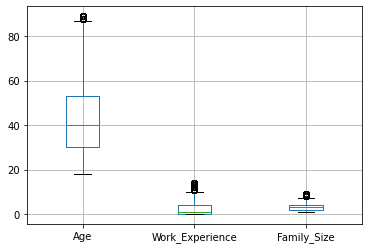

In [41]:
#Use the Box and Whisker Plot train_num_attr:

train_num_attr.boxplot(column = num_attr)

<AxesSubplot:>

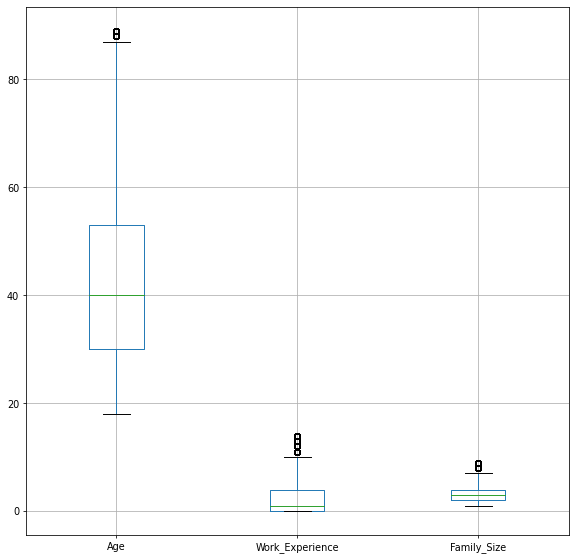

In [42]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
train_num_attr.boxplot(column = num_attr)

In [43]:
#Create a user defined function called remove_outlier for getting the threshold value from IQR.
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [44]:
#Remove the Outlier from "Age":
lowincome,uppincome=remove_outlier(train_num_attr["Age"])
train_num_attr[["Age"]] = np.where(train_num_attr[["Age"]]>uppincome,uppincome,train_num_attr[["Age"]])
train_num_attr[["Age"]] = np.where(train_num_attr[["Age"]]<lowincome,lowincome,train_num_attr[["Age"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [45]:
#Remove the Outlier from "Work_Experience":
lowincome,uppincome=remove_outlier(train_num_attr["Work_Experience"])
train_num_attr[["Work_Experience"]] = np.where(train_num_attr[["Work_Experience"]]>uppincome,uppincome,train_num_attr[["Work_Experience"]])
train_num_attr[["Work_Experience"]] = np.where(train_num_attr[["Work_Experience"]]<lowincome,lowincome,train_num_attr[["Work_Experience"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [46]:
#Remove the Outlier from "Family_Size":
lowincome,uppincome=remove_outlier(train_num_attr["Family_Size"])
train_num_attr[["Family_Size"]] = np.where(train_num_attr[["Family_Size"]]>uppincome,uppincome,train_num_attr[["Family_Size"]])
train_num_attr[["Family_Size"]] = np.where(train_num_attr[["Family_Size"]]<lowincome,lowincome,train_num_attr[["Family_Size"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

<AxesSubplot:>

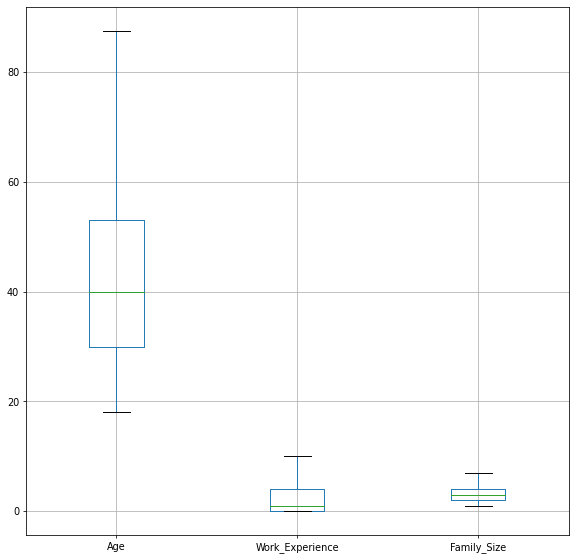

In [47]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
train_num_attr.boxplot(column = num_attr)

In [48]:
#Outlier is removed in train_num_attr

# Outlier Treatmetn in test_num_attr

<AxesSubplot:>

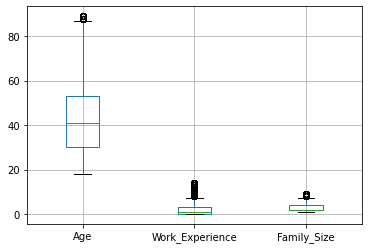

In [49]:
#Use the Box and Whisker Plot train_num_attr:

test_num_attr.boxplot(column = num_attr)

<AxesSubplot:>

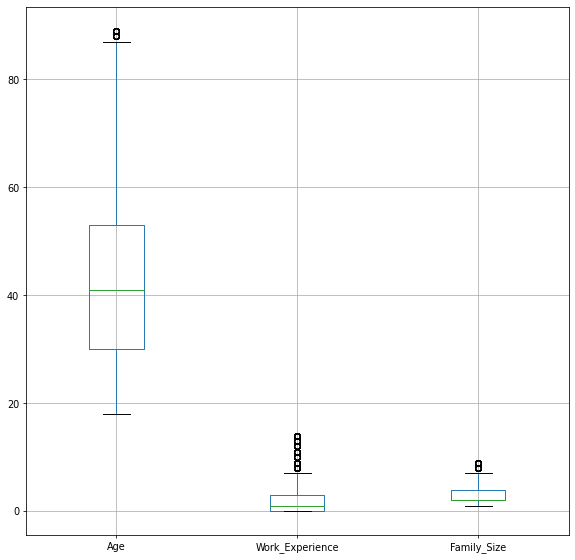

In [50]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
test_num_attr.boxplot(column = num_attr)

In [51]:
#Create a user defined function called remove_outlier for getting the threshold value from IQR.
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [52]:
#Remove the Outlier from "Age":
lowincome,uppincome=remove_outlier(test_num_attr["Age"])
test_num_attr[["Age"]] = np.where(test_num_attr[["Age"]]>uppincome,uppincome,test_num_attr[["Age"]])
test_num_attr[["Age"]] = np.where(test_num_attr[["Age"]]<lowincome,lowincome,test_num_attr[["Age"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [53]:
#Remove the Outlier from "Work_Experience":
lowincome,uppincome=remove_outlier(test_num_attr["Work_Experience"])
test_num_attr[["Work_Experience"]] = np.where(test_num_attr[["Work_Experience"]]>uppincome,uppincome,test_num_attr[["Work_Experience"]])
test_num_attr[["Work_Experience"]] = np.where(test_num_attr[["Work_Experience"]]<lowincome,lowincome,test_num_attr[["Work_Experience"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [54]:
#Remove the Outlier from "Family_Size":
lowincome,uppincome=remove_outlier(test_num_attr["Family_Size"])
test_num_attr[["Family_Size"]] = np.where(test_num_attr[["Family_Size"]]>uppincome,uppincome,test_num_attr[["Family_Size"]])
test_num_attr[["Family_Size"]] = np.where(test_num_attr[["Family_Size"]]<lowincome,lowincome,test_num_attr[["Family_Size"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

<AxesSubplot:>

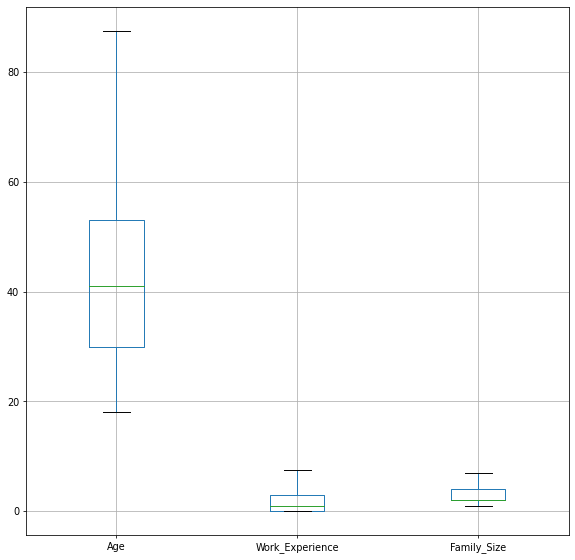

In [55]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
test_num_attr.boxplot(column = num_attr)

In [56]:
#Outlier is removed in test_num_attr also


# Scaling through standardizations:

In [57]:
from sklearn.preprocessing import StandardScaler
StdScale = StandardScaler()

In [58]:
#Scale the train_num_attr  data(Only Numerical data):
train_num_attr[['Age']] = StdScale.fit_transform(train_num_attr[['Age']])
train_num_attr[['Work_Experience']] = StdScale.fit_transform(train_num_attr[['Work_Experience']])
train_num_attr[['Family_Size']] = StdScale.fit_transform(train_num_attr[['Family_Size']])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [59]:
train_num_attr.head()

,Age,Work_Experience,Family_Size
0,-1.285917,-0.456344,0.805152
1,-0.327084,-0.456344,0.111509
2,1.410800,-0.456344,-1.275777
3,1.410800,-0.778742,-0.582134
4,-0.207230,-0.456344,2.192437


In [60]:
#Scale the test_num_attr:
test_num_attr[['Age']] = StdScale.fit_transform(test_num_attr[['Age']])
test_num_attr[['Work_Experience']] = StdScale.fit_transform(test_num_attr[['Work_Experience']])
test_num_attr[['Family_Size']] = StdScale.fit_transform(test_num_attr[['Family_Size']])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [61]:
test_num_attr.head()

,Age,Work_Experience,Family_Size
0,-0.451029,-0.815223,-1.208229
1,-0.392012,2.013826,0.837325
2,1.496528,-0.815223,-1.208229
3,0.906359,2.013826,-0.526378
4,-1.454315,-0.438016,0.837325


In [62]:
#DO the Encoding(dummification) to the cat_attr:
dummies1 = pd.get_dummies(train_cat_attr[['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1'
 ]],drop_first=True)
dummies1.head().shape

(5, 19)

In [63]:
#DO the Encoding(dummification) to the cat_attr:
dummies2 = pd.get_dummies(test_cat_attr[['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1'
 ]],drop_first=True)

dummies2.head().shape

(5, 19)

In [64]:
dummies1.columns

Index(['Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [65]:
dummies2.columns

Index(['Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [66]:
#Combine the scaled train_num_attr and dummies1:
#Combine the numerical and Categorical data for train_data:
#Combine the train_num_attr and dummies1:
train_final = pd.concat([train_num_attr,dummies1,train_Segmentation],axis=1)
train_final.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,-1.285917,-0.456344,0.805152,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,D
1,-0.327084,-0.456344,0.111509,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,A
2,1.410800,-0.456344,-1.275777,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,B
3,1.410800,-0.778742,-0.582134,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,B
4,-0.207230,-0.456344,2.192437,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,A


In [67]:
#Combine the scaled test_num_attr and dummies2:
#Combine the numerical and Categorical data for test_data:
#Combine the tesr_num_attr and dummies2:
test_final = pd.concat([test_num_attr,dummies2],axis=1)
test_final.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-0.451029,-0.815223,-1.208229,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-0.392012,2.013826,0.837325,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.496528,-0.815223,-1.208229,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.906359,2.013826,-0.526378,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,-1.454315,-0.438016,0.837325,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [68]:
#New Dimesnion for the train_final and test_final data:
print("Dimension for the train_final:",train_final.shape)
print("Dimension for the test_final:",test_final.shape)

Dimension for the train_final: (8068, 23)
Dimension for the test_final: (2627, 22)


In [69]:
#Train_columns:
train_final.columns

Index(['Age', 'Work_Experience', 'Family_Size', 'Gender_Male',
       'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7', 'Segmentation'],
      dtype='object')

In [70]:
#Test Columns:
test_final.columns

Index(['Age', 'Work_Experience', 'Family_Size', 'Gender_Male',
       'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [71]:
#We know the target column is "is_promoted":
train_final[["Segmentation"]].value_counts()

Segmentation
D               2268
A               1972
C               1970
B               1858
dtype: int64

In [72]:
#Data Distribution for the Crop_Damage(Target_Column):
#Value Percentage wise in target column("is_promoted"): 
train_final[["Segmentation"]].value_counts()/train_final.shape[0]*100

Segmentation
D               28.111056
A               24.442241
C               24.417452
B               23.029251
dtype: float64

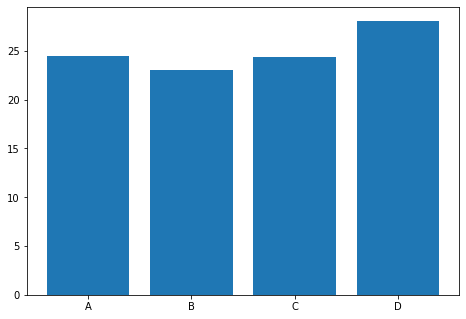

In [73]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Segment = ["A","B","C","D"]
value = [24.442241,23.029251,24.417452,28.111056]
ax.bar(Segment,value)
plt.show()

In [74]:
#Drop the "Segmentation" in train_final data:
train_final.drop(["Segmentation"],axis=1,inplace=True)

In [75]:
#Split train_final into train and test:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_final,train_Segmentation,test_size=0.20,random_state=123)

In [76]:
X_train.shape,y_train.shape

((6454, 22), (6454, 1))

In [77]:
X_test.shape,y_test.shape

((1614, 22), (1614, 1))

In [78]:
#After Observing the Target column which has four levels(A,B,C,D)
#This is a classification Problem.

In [79]:
print("--------------------------------------------------Model Building-------------------------------------------------------")

--------------------------------------------------Model Building-------------------------------------------------------


In [80]:
#Build the LogisticRegression:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(solver="lbfgs")
#Build the Model:
LogR.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [81]:
#Predict on X_train itself to verify with the actual result:
pred_X_train = LogR.predict(X_train)

In [82]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_log = LogR.predict(X_test)
pred_test_log = LogR.predict(test_final)

In [83]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_log = classification_report(pred_X_train,y_train)
result_X_test_log = classification_report(pred_X_test_log,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_log)
print("-----Result on Validation Data------")
print(result_X_test_log)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.49      0.43      0.46      1811
           B       0.21      0.39      0.28       800
           C       0.61      0.52      0.56      1881
           D       0.70      0.65      0.68      1962

    accuracy                           0.52      6454
   macro avg       0.50      0.50      0.49      6454
weighted avg       0.56      0.52      0.53      6454

-----Result on Validation Data------
              precision    recall  f1-score   support

           A       0.49      0.43      0.46       461
           B       0.20      0.39      0.26       199
           C       0.58      0.47      0.52       466
           D       0.70      0.63      0.66       488

    accuracy                           0.50      1614
   macro avg       0.49      0.48      0.47      1614
weighted avg       0.54      0.50      0.51      1614



In [84]:
#Concat the test_employee_id and pred_test:
Sub_Log = pd.concat([test_ID,pd.Series(pred_test_log)],axis=1)

In [85]:
Sub_Log.head()

,ID,0
0,458989,A
1,458994,C
2,458996,B
3,459000,A
4,459001,D


In [86]:
Sub_Log.rename(columns={0:"Segmentation"},inplace=True)

In [87]:
Sub_Log.head()

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,B
3,459000,A
4,459001,D


In [88]:
#Export Result into Local System:
Sub_Log.to_csv("1.Sub_Log.csv",index=False)

In [89]:
#Result on Portal:
#Your score for this submission is : 0.50285351934052,

# 2. KNN Classifier

In [90]:
#Build the KNN Model(Modelless) Algorithm:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors = 5,metric = "minkowski",p=2)
#Build the Model:
KNN_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier()

In [91]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_KNN = KNN_class.predict(X_train)

In [92]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_KNN = KNN_class.predict(X_test)
pred_test_KNN = KNN_class.predict(test_final)

In [93]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_KNN = classification_report(pred_X_train_KNN,y_train)
result_X_test_KNN = classification_report(pred_X_test_KNN,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_KNN)
print("-----Result on Validation Data------")
print(result_X_test_KNN)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.67      0.55      0.60      1914
           B       0.51      0.55      0.53      1361
           C       0.63      0.64      0.63      1547
           D       0.69      0.77      0.73      1632

    accuracy                           0.63      6454
   macro avg       0.62      0.63      0.62      6454
weighted avg       0.63      0.63      0.63      6454

-----Result on Validation Data------
              precision    recall  f1-score   support

           A       0.45      0.40      0.43       452
           B       0.32      0.35      0.33       357
           C       0.52      0.49      0.51       400
           D       0.58      0.63      0.60       405

    accuracy                           0.47      1614
   macro avg       0.47      0.47      0.47      1614
weighted avg       0.47      0.47      0.47      1614



In [94]:
#Concat the test_employee_id and pred_test:
Sub_KNN = pd.concat([test_ID,pd.Series(pred_test_KNN)],axis=1)

In [95]:
Sub_KNN.head()

,ID,0
0,458989,B
1,458994,C
2,458996,C
3,459000,C
4,459001,D


In [96]:
#Rename the ColumnName:
Sub_KNN.rename(columns = {0:"Segmentation"},inplace=True)

In [97]:
Sub_KNN.head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,C
3,459000,C
4,459001,D


In [98]:
Sub_KNN.to_csv("2.sub_KNN.csv",index=False)

In [99]:
#Portal Result:
#Your score for this submission is : 0.553582752060875,

# 3.Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
GNB_class = GaussianNB()
#Build the Model:
GNB_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [101]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_NB = GNB_class.predict(X_train)

In [102]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_NB = GNB_class.predict(X_test)
pred_test_NB = GNB_class.predict(test_final)

In [103]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_NB = classification_report(pred_X_train_NB,y_train)
result_X_test_NB = classification_report(pred_X_test_NB,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_NB)
print("-----Result on Validation Data------")
print(result_X_test_NB)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.37      0.43      0.40      1366
           B       0.18      0.35      0.24       740
           C       0.67      0.43      0.53      2470
           D       0.64      0.63      0.63      1878

    accuracy                           0.48      6454
   macro avg       0.47      0.46      0.45      6454
weighted avg       0.54      0.48      0.50      6454

-----Result on Validation Data------
              precision    recall  f1-score   support

           A       0.35      0.42      0.38       332
           B       0.15      0.34      0.21       172
           C       0.66      0.40      0.50       634
           D       0.64      0.59      0.62       476

    accuracy                           0.45      1614
   macro avg       0.45      0.44      0.43      1614
weighted avg       0.54      0.45      0.48      1614



In [104]:
#Concat the test_employee_id and pred_test:
Sub_NB = pd.concat([test_ID,pd.Series(pred_test_NB)],axis=1)

In [105]:
Sub_NB.head()

,ID,0
0,458989,B
1,458994,C
2,458996,C
3,459000,C
4,459001,D


In [106]:
Sub_NB.rename(columns = {0:"Segmentation"},inplace=True)

In [107]:
#Download into Local System:
Sub_NB.to_csv("3.Sub_NB.csv",index=False)

In [108]:
#Result on Portal:
#Your score for this submission is : 0.44705136334812934,

# 4. Decision Tree Classifier:

In [109]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
#Build the Model:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_DT = DT.predict(X_train)

In [111]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_DT = DT.predict(X_test)
pred_test_DT = DT.predict(test_final)

In [112]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_DT = classification_report(pred_X_train_DT,y_train)
result_X_test_DT = classification_report(pred_X_test_DT,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_DT)
print("-----Result on Validation Data------")
print(result_X_test_DT)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.99      0.93      0.96      1667
           B       0.94      0.93      0.94      1481
           C       0.93      0.96      0.95      1536
           D       0.96      0.99      0.98      1770

    accuracy                           0.96      6454
   macro avg       0.96      0.95      0.95      6454
weighted avg       0.96      0.96      0.96      6454

-----Result on Validation Data------
              precision    recall  f1-score   support

           A       0.37      0.39      0.38       381
           B       0.33      0.36      0.35       365
           C       0.50      0.43      0.46       439
           D       0.58      0.59      0.58       429

    accuracy                           0.45      1614
   macro avg       0.45      0.44      0.44      1614
weighted avg       0.45      0.45      0.45      1614



In [113]:
#Concat the test_employee_id and pred_test:
Sub_DT = pd.concat([test_ID ,pd.Series(pred_test_DT)],axis=1)

In [114]:
Sub_DT.head()

,ID,0
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,D


In [115]:
#Rename the Column:
Sub_DT.rename(columns = {0:"Segmentation"},inplace=True)

In [116]:
#Download into Local System:
Sub_DT.to_csv("4.Sub_DT.csv",index=False)

In [117]:
#Result on Portal:
#Your score for this submission is : 0.5320228281547241,

# 5. Random Forest:

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Build the Model:
rf.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [119]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_rf = rf.predict(X_train)

In [120]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_rf = rf.predict(X_test)
pred_test_rf = rf.predict(test_final)

In [121]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_rf = classification_report(pred_X_train_rf,y_train)
result_X_test_rf = classification_report(pred_X_test_rf,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_rf)
print("--------------------------Result on Validation Data------")
print(result_X_test_rf)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.96      0.96      0.96      1563
           B       0.92      0.95      0.94      1423
           C       0.96      0.93      0.95      1629
           D       0.98      0.98      0.98      1839

    accuracy                           0.96      6454
   macro avg       0.95      0.95      0.95      6454
weighted avg       0.96      0.96      0.96      6454

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           A       0.41      0.43      0.42       379
           B       0.31      0.37      0.34       331
           C       0.54      0.48      0.51       430
           D       0.66      0.61      0.63       474

    accuracy                           0.48      1614
   macro avg       0.48      0.47      0.47      1614
weighted avg       0.50      0.48      0.49      1614



In [122]:
#Concat the test_employee_id and pred_test:
Sub_rf = pd.concat([test_ID,pd.Series(pred_test_rf)],axis=1)

In [123]:
Sub_rf.head()

,ID,0
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,D


In [124]:
Sub_rf.rename(columns={0:"Segmentation"},inplace=True)

In [125]:
Sub_rf.head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,D


In [126]:
#Download into Local System:
Sub_DT.to_csv("5.Sub_rf.csv",index=False)

In [127]:
#Result on Portal:
#Your score for this submission is : 0.5320228281547241,

# 6. GradientBoosting Classifier:

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
#Model building
GB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [129]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_GB = GB.predict(X_train)#Concat the test_ID and pred_test:

In [130]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_GB = rf.predict(X_test)
pred_test_GB = rf.predict(test_final)

In [131]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_GB = classification_report(pred_X_train_GB,y_train)
result_X_test_GB = classification_report(pred_X_test_GB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_GB)
print("--------------------------Result on Validation Data------")
print(result_X_test_GB)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.54      0.51      0.52      1661
           B       0.36      0.50      0.42      1047
           C       0.63      0.60      0.61      1677
           D       0.75      0.67      0.71      2069

    accuracy                           0.58      6454
   macro avg       0.57      0.57      0.57      6454
weighted avg       0.60      0.58      0.59      6454

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           A       0.41      0.43      0.42       379
           B       0.31      0.37      0.34       331
           C       0.54      0.48      0.51       430
           D       0.66      0.61      0.63       474

    accuracy                           0.48      1614
   macro avg       0.48      0.47      0.47      1614
weighted avg       0.50      0.48      0.49      1614



In [132]:
#Concat the test_employee and pred_test:
Sub_GB = pd.concat([test_ID,pd.Series(pred_test_GB)],axis=1)

In [133]:
Sub_GB.head()

,ID,0
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,D


In [134]:
Sub_GB.rename(columns = {0:"Segmentation"},inplace=True)

In [135]:
Sub_GB.to_csv("6.Sub_GB.csv",index=False)

In [136]:
#Result on Portal:
#Your score for this submission is : 0.6233354470513633,

# 7.Hist Gradient Boosting Classifier

In [137]:
#NOTE: This is still experiemental:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB = HistGradientBoostingClassifier()
#Build Model:
HGB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


HistGradientBoostingClassifier()

In [138]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_HGB = HGB.predict(X_train)

In [139]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_HGB = HGB.predict(X_test)
pred_test_HGB = HGB.predict(test_final)

In [140]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_HGB = classification_report(pred_X_train_HGB,y_train)
result_X_test_HGB = classification_report(pred_X_test_HGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_HGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_HGB)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.67      0.68      0.68      1542
           B       0.56      0.68      0.62      1198
           C       0.73      0.70      0.71      1678
           D       0.85      0.77      0.81      2036

    accuracy                           0.71      6454
   macro avg       0.70      0.71      0.70      6454
weighted avg       0.72      0.71      0.72      6454

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           A       0.43      0.45      0.44       387
           B       0.31      0.41      0.35       297
           C       0.57      0.52      0.54       417
           D       0.71      0.60      0.65       513

    accuracy                           0.51      1614
   macro avg       0.50      0.49      0.50      1614
weighted avg       0.53      0.51      0.52      1614



In [141]:
#Concat the test_employee_id and pred_test:
Sub_HGB = pd.concat([test_ID,pd.Series(pred_test_HGB)],axis=1)

In [142]:
Sub_HGB.head()

,ID,0
0,458989,B
1,458994,D
2,458996,C
3,459000,C
4,459001,D


In [143]:
Sub_HGB.rename(columns={0:"Segmentation"},inplace=True)

In [144]:
Sub_HGB.head()

,ID,Segmentation
0,458989,B
1,458994,D
2,458996,C
3,459000,C
4,459001,D


In [145]:
Sub_HGB.to_csv("7.Sub_HGB.csv",index=False)

In [146]:
#Result on Portal:
#Your score for this submission is : 0.5656309448319594,

# 8. Adaboost Classifier

In [147]:
#Adaboost Classifier:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier()
#Build Model:
AD = AD.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [148]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_AD = AD.predict(X_train)

In [149]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_AD = AD.predict(X_test)
pred_test_AD = AD.predict(test_final)

In [150]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_AD = classification_report(pred_X_train_AD,y_train)
result_X_test_AD = classification_report(pred_X_test_AD,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_AD)
print("--------------------------Result on Validation Data------")
print(result_X_test_AD)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.48      0.43      0.45      1744
           B       0.29      0.41      0.34      1027
           C       0.58      0.52      0.55      1762
           D       0.69      0.66      0.67      1921

    accuracy                           0.52      6454
   macro avg       0.51      0.50      0.50      6454
weighted avg       0.54      0.52      0.53      6454

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           A       0.46      0.43      0.45       426
           B       0.27      0.41      0.33       260
           C       0.56      0.48      0.51       445
           D       0.70      0.63      0.66       483

    accuracy                           0.50      1614
   macro avg       0.50      0.49      0.49      1614
weighted avg       0.53      0.50      0.51      1614



In [151]:
#Concat the test_employee_id and pred_test_AD:
Sub_AD = pd.concat([test_ID,pd.Series(pred_test_AD)],axis=1)

In [152]:
Sub_AD.head()

,ID,0
0,458989,A
1,458994,C
2,458996,B
3,459000,B
4,459001,D


In [153]:
Sub_AD.rename(columns = {0:"Segmentation"},inplace=True)

In [154]:
Sub_AD.head()

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,B
3,459000,B
4,459001,D


In [155]:
Sub_AD.to_csv("8.Sub_AD.csv",index=False)

In [156]:
#Result On POrtal:
#Your score for this submission is : 0.5047558655675333,

# 9. Support Vector machine

In [157]:
from sklearn.svm import SVC
#import "LinearSVC "
SVC = SVC()
#Model Building:
SVC.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [158]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_SVC = SVC.predict(X_train)

In [159]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_SVC = SVC.predict(X_test)
pred_test_SVC = SVC.predict(test_final)

In [160]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_SVC = SVC.predict(X_test)
pred_test_SVC = SVC.predict(test_final)

In [161]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_SVC = classification_report(pred_X_train_SVC,y_train)
result_X_test_SVC = classification_report(pred_X_test_SVC,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_SVC)
print("--------------------------Result on Validation Data------")
print(result_X_test_SVC)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.58      0.49      0.53      1840
           B       0.37      0.50      0.43      1095
           C       0.59      0.60      0.60      1571
           D       0.72      0.68      0.70      1948

    accuracy                           0.58      6454
   macro avg       0.57      0.57      0.56      6454
weighted avg       0.59      0.58      0.58      6454

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           A       0.51      0.45      0.48       458
           B       0.31      0.42      0.35       288
           C       0.55      0.55      0.55       381
           D       0.70      0.63      0.66       487

    accuracy                           0.52      1614
   macro avg       0.52      0.51      0.51      1614
weighted avg       0.54      0.52      0.53      1614



In [162]:
#Concat the test_employee_id and pred_test_SVC:
Sub_SVC = pd.concat([test_ID,pd.Series(pred_test_SVC)],axis=1)

In [163]:
Sub_SVC.head()

,ID,0
0,458989,A
1,458994,C
2,458996,B
3,459000,C
4,459001,D


In [164]:
Sub_SVC.rename( columns = {0:"Segmentation"},inplace=True)

In [165]:
Sub_SVC.head()

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,B
3,459000,C
4,459001,D


In [166]:
Sub_SVC.to_csv("9.Sub_SVC.csv",index=False)

In [167]:
#Portal Result:
#Your score for this submission is : 0.5485098287888396,

# 10.XGBoost Classifier:

In [168]:
# check xgboost version
import xgboost
print(xgboost.__version__)
#Note: If it is not installed then install using below command:
#sudo pip install xgboost

1.2.0


In [169]:
#Xgboost Classifier:
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()
#Build the Model:
XGB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_XGB = XGB.predict(X_train)

In [171]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_XGB = XGB.predict(X_test)
pred_test_XGB = XGB.predict(test_final)

In [172]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_XGB = classification_report(pred_X_train_XGB,y_train)
result_X_test_XGB = classification_report(pred_X_test_XGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_XGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_XGB)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           A       0.76      0.77      0.76      1559
           B       0.66      0.75      0.70      1286
           C       0.81      0.75      0.78      1706
           D       0.88      0.85      0.86      1903

    accuracy                           0.78      6454
   macro avg       0.78      0.78      0.78      6454
weighted avg       0.79      0.78      0.78      6454

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           A       0.40      0.43      0.41       378
           B       0.31      0.39      0.35       309
           C       0.55      0.49      0.52       430
           D       0.68      0.60      0.64       497

    accuracy                           0.49      1614
   macro avg       0.49      0.48      0.48      1614
weighted avg       0.51      0.49      0.50      1614



In [173]:
#Concat the test_employee_id and pred_test_SVC:
Sub_XGB = pd.concat([test_ID,pd.Series(pred_test_XGB)],axis=1)

In [174]:
Sub_XGB.head()

,ID,0
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,D


In [175]:
Sub_XGB.rename(columns={0:"Segmentation"},inplace=True)

In [176]:
Sub_XGB.to_csv("10.Sub_XGB.csv",index=False)

In [177]:
#Result on Portal:
#Your score for this submission is : 0.575142675967026,

# 11.LightGBM

In [178]:
#install the LightGBM:
#!pip install lightgbm
#sudo pip install lightgbm

In [179]:
#import LightGradient Boosting Machine:
import lightgbm
print(lightgbm.__version__)

3.0.0


In [180]:
from lightgbm import LGBMClassifier
LGBM= LGBMClassifier()
#Building the Model:
LGBM.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier()

In [181]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_LGBM = LGBM.predict(X_train)

In [182]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_LGBM = LGBM.predict(X_test)
pred_test_LGBM = LGBM.predict(test_final)

In [183]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_LGBM = classification_report(pred_X_train_LGBM,y_train)
result_X_test_LGBM = classification_report(pred_X_test_LGBM,y_test)
print("--------------------------Result on Train Data for LGBM:-----------")
print(result_X_train_LGBM)
print("--------------------------Result on Validation Data LGBM:------")
print(result_X_test_LGBM)
#classification_report()

--------------------------Result on Train Data for LGBM:-----------
              precision    recall  f1-score   support

           A       0.66      0.65      0.66      1583
           B       0.53      0.66      0.59      1178
           C       0.72      0.68      0.70      1676
           D       0.83      0.75      0.79      2017

    accuracy                           0.69      6454
   macro avg       0.68      0.69      0.68      6454
weighted avg       0.70      0.69      0.70      6454

--------------------------Result on Validation Data LGBM:------
              precision    recall  f1-score   support

           A       0.43      0.46      0.44       378
           B       0.31      0.40      0.35       298
           C       0.58      0.52      0.55       423
           D       0.72      0.61      0.66       515

    accuracy                           0.51      1614
   macro avg       0.51      0.50      0.50      1614
weighted avg       0.54      0.51      0.52      1614

In [184]:
#Concat the test_employee_id and pred_test_SVC:
Sub_LGBM = pd.concat([test_ID,pd.Series(pred_test_LGBM)],axis=1)

In [185]:
Sub_LGBM.head()

,ID,0
0,458989,B
1,458994,D
2,458996,A
3,459000,C
4,459001,D


In [186]:
Sub_LGBM.rename(columns={0:"Segmentation"},inplace=True)

In [187]:
Sub_LGBM.head()

,ID,Segmentation
0,458989,B
1,458994,D
2,458996,A
3,459000,C
4,459001,D


In [188]:
Sub_LGBM.to_csv("11.Sub_LGBM.csv",index=False)

In [189]:
#Result on Portal:
#Your score for this submission is : 0.569435637285986,

# 12.Gradient Boosting with CatBoost

In [190]:
#It is also third party library:
#Installing catboost:
!pip install catboost
#sudo pip install catboost

In [191]:
#Check the catboost version:
import catboost
print(catboost.__version__)

0.24.2


In [192]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
#Build the Model:
catb.fit(X_train,y_train)

Learning rate set to 0.087021
0:	learn: 1.3440834	total: 147ms	remaining: 2m 26s
1:	learn: 1.3096620	total: 165ms	remaining: 1m 22s
2:	learn: 1.2822836	total: 176ms	remaining: 58.3s
3:	learn: 1.2616475	total: 186ms	remaining: 46.4s
4:	learn: 1.2431546	total: 211ms	remaining: 42s
5:	learn: 1.2278715	total: 236ms	remaining: 39s
6:	learn: 1.2126353	total: 245ms	remaining: 34.8s
7:	learn: 1.1989288	total: 258ms	remaining: 31.9s
8:	learn: 1.1850485	total: 284ms	remaining: 31.3s
9:	learn: 1.1740512	total: 303ms	remaining: 30s
10:	learn: 1.1639284	total: 315ms	remaining: 28.3s
11:	learn: 1.1551436	total: 326ms	remaining: 26.8s
12:	learn: 1.1473090	total: 335ms	remaining: 25.4s
13:	learn: 1.1395544	total: 348ms	remaining: 24.5s
14:	learn: 1.1346554	total: 358ms	remaining: 23.5s
15:	learn: 1.1285039	total: 386ms	remaining: 23.7s
16:	learn: 1.1230534	total: 412ms	remaining: 23.8s
17:	learn: 1.1176927	total: 432ms	remaining: 23.6s
18:	learn: 1.1128500	total: 450ms	remaining: 23.3s
19:	learn: 1.10

162:	learn: 0.9417802	total: 1.76s	remaining: 9.04s
163:	learn: 0.9412745	total: 1.77s	remaining: 9.02s
164:	learn: 0.9408694	total: 1.78s	remaining: 9s
165:	learn: 0.9400217	total: 1.79s	remaining: 8.98s
166:	learn: 0.9393809	total: 1.8s	remaining: 8.96s
167:	learn: 0.9386917	total: 1.81s	remaining: 8.95s
168:	learn: 0.9380783	total: 1.81s	remaining: 8.93s
169:	learn: 0.9375789	total: 1.82s	remaining: 8.91s
170:	learn: 0.9367856	total: 1.83s	remaining: 8.89s
171:	learn: 0.9363218	total: 1.84s	remaining: 8.87s
172:	learn: 0.9360195	total: 1.85s	remaining: 8.84s
173:	learn: 0.9352430	total: 1.86s	remaining: 8.82s
174:	learn: 0.9344838	total: 1.87s	remaining: 8.8s
175:	learn: 0.9338139	total: 1.88s	remaining: 8.79s
176:	learn: 0.9331779	total: 1.89s	remaining: 8.77s
177:	learn: 0.9324895	total: 1.89s	remaining: 8.75s
178:	learn: 0.9317521	total: 1.9s	remaining: 8.73s
179:	learn: 0.9313442	total: 1.92s	remaining: 8.72s
180:	learn: 0.9307738	total: 1.93s	remaining: 8.71s
181:	learn: 0.9299

337:	learn: 0.8558467	total: 3.33s	remaining: 6.52s
338:	learn: 0.8553378	total: 3.34s	remaining: 6.51s
339:	learn: 0.8546700	total: 3.35s	remaining: 6.5s
340:	learn: 0.8541602	total: 3.36s	remaining: 6.49s
341:	learn: 0.8538311	total: 3.37s	remaining: 6.47s
342:	learn: 0.8535739	total: 3.37s	remaining: 6.46s
343:	learn: 0.8532780	total: 3.38s	remaining: 6.46s
344:	learn: 0.8528870	total: 3.39s	remaining: 6.45s
345:	learn: 0.8525503	total: 3.4s	remaining: 6.43s
346:	learn: 0.8519642	total: 3.41s	remaining: 6.42s
347:	learn: 0.8516653	total: 3.42s	remaining: 6.41s
348:	learn: 0.8513745	total: 3.43s	remaining: 6.4s
349:	learn: 0.8511176	total: 3.44s	remaining: 6.38s
350:	learn: 0.8507455	total: 3.45s	remaining: 6.37s
351:	learn: 0.8502488	total: 3.46s	remaining: 6.36s
352:	learn: 0.8499041	total: 3.46s	remaining: 6.35s
353:	learn: 0.8494926	total: 3.47s	remaining: 6.34s
354:	learn: 0.8491966	total: 3.48s	remaining: 6.33s
355:	learn: 0.8488142	total: 3.49s	remaining: 6.31s
356:	learn: 0.8

512:	learn: 0.7976565	total: 4.91s	remaining: 4.66s
513:	learn: 0.7971992	total: 4.92s	remaining: 4.65s
514:	learn: 0.7967782	total: 4.93s	remaining: 4.64s
515:	learn: 0.7965117	total: 4.94s	remaining: 4.63s
516:	learn: 0.7960941	total: 4.95s	remaining: 4.62s
517:	learn: 0.7956774	total: 4.96s	remaining: 4.61s
518:	learn: 0.7954185	total: 4.97s	remaining: 4.6s
519:	learn: 0.7950839	total: 4.98s	remaining: 4.59s
520:	learn: 0.7947898	total: 4.99s	remaining: 4.59s
521:	learn: 0.7945808	total: 5s	remaining: 4.58s
522:	learn: 0.7943068	total: 5.02s	remaining: 4.58s
523:	learn: 0.7939871	total: 5.03s	remaining: 4.57s
524:	learn: 0.7936172	total: 5.04s	remaining: 4.56s
525:	learn: 0.7933060	total: 5.06s	remaining: 4.56s
526:	learn: 0.7931134	total: 5.08s	remaining: 4.56s
527:	learn: 0.7927896	total: 5.1s	remaining: 4.56s
528:	learn: 0.7924456	total: 5.12s	remaining: 4.56s
529:	learn: 0.7922473	total: 5.14s	remaining: 4.56s
530:	learn: 0.7920486	total: 5.17s	remaining: 4.56s
531:	learn: 0.791

677:	learn: 0.7511466	total: 6.87s	remaining: 3.26s
678:	learn: 0.7509244	total: 6.88s	remaining: 3.25s
679:	learn: 0.7508145	total: 6.89s	remaining: 3.24s
680:	learn: 0.7506936	total: 6.9s	remaining: 3.23s
681:	learn: 0.7505723	total: 6.91s	remaining: 3.22s
682:	learn: 0.7503232	total: 6.92s	remaining: 3.21s
683:	learn: 0.7502141	total: 6.92s	remaining: 3.2s
684:	learn: 0.7499207	total: 6.93s	remaining: 3.19s
685:	learn: 0.7497056	total: 6.94s	remaining: 3.18s
686:	learn: 0.7495514	total: 6.95s	remaining: 3.17s
687:	learn: 0.7493612	total: 6.96s	remaining: 3.16s
688:	learn: 0.7491639	total: 6.97s	remaining: 3.15s
689:	learn: 0.7488681	total: 6.98s	remaining: 3.14s
690:	learn: 0.7487505	total: 6.99s	remaining: 3.13s
691:	learn: 0.7484384	total: 7s	remaining: 3.12s
692:	learn: 0.7482033	total: 7.01s	remaining: 3.1s
693:	learn: 0.7479022	total: 7.02s	remaining: 3.1s
694:	learn: 0.7475604	total: 7.03s	remaining: 3.08s
695:	learn: 0.7474438	total: 7.04s	remaining: 3.07s
696:	learn: 0.74725

844:	learn: 0.7129089	total: 8.46s	remaining: 1.55s
845:	learn: 0.7126280	total: 8.48s	remaining: 1.54s
846:	learn: 0.7124265	total: 8.49s	remaining: 1.53s
847:	learn: 0.7121649	total: 8.5s	remaining: 1.52s
848:	learn: 0.7119682	total: 8.51s	remaining: 1.51s
849:	learn: 0.7117103	total: 8.52s	remaining: 1.5s
850:	learn: 0.7114906	total: 8.53s	remaining: 1.49s
851:	learn: 0.7112770	total: 8.55s	remaining: 1.49s
852:	learn: 0.7111417	total: 8.56s	remaining: 1.47s
853:	learn: 0.7108069	total: 8.57s	remaining: 1.46s
854:	learn: 0.7106293	total: 8.57s	remaining: 1.45s
855:	learn: 0.7104833	total: 8.58s	remaining: 1.44s
856:	learn: 0.7101884	total: 8.59s	remaining: 1.43s
857:	learn: 0.7099587	total: 8.6s	remaining: 1.42s
858:	learn: 0.7097855	total: 8.61s	remaining: 1.41s
859:	learn: 0.7095468	total: 8.62s	remaining: 1.4s
860:	learn: 0.7091312	total: 8.63s	remaining: 1.39s
861:	learn: 0.7090064	total: 8.63s	remaining: 1.38s
862:	learn: 0.7087415	total: 8.64s	remaining: 1.37s
863:	learn: 0.70

In [193]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_catb = catb.predict(X_train)

In [194]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_catb = catb.predict(X_test)
pred_test_catb =catb.predict(test_final)

In [195]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_catb = classification_report(pred_X_train_catb,y_train)
result_X_test_catb = classification_report(pred_X_test_catb,y_test)
print("--------------------------Result on Train Data for Catb:-----------")
print(result_X_train_catb)
print("--------------------------Result on Validation Data Catb:------")
print(result_X_test_catb)
#classification_report()

--------------------------Result on Train Data for Catb:-----------
              precision    recall  f1-score   support

           A       0.73      0.75      0.74      1540
           B       0.62      0.72      0.67      1270
           C       0.77      0.73      0.75      1681
           D       0.87      0.81      0.84      1963

    accuracy                           0.76      6454
   macro avg       0.75      0.75      0.75      6454
weighted avg       0.76      0.76      0.76      6454

--------------------------Result on Validation Data Catb:------
              precision    recall  f1-score   support

           A       0.45      0.47      0.46       384
           B       0.32      0.42      0.37       298
           C       0.58      0.50      0.54       434
           D       0.69      0.61      0.65       498

    accuracy                           0.51      1614
   macro avg       0.51      0.50      0.50      1614
weighted avg       0.53      0.51      0.52      1614

In [196]:
#Concat the test_employee_id and pred_test_catb:
Sub_catb = pd.concat([test_ID,pd.DataFrame(pred_test_catb)],axis=1)

In [197]:
Sub_catb.head()

,ID,0
0,458989,B
1,458994,C
2,458996,B
3,459000,C
4,459001,D


In [198]:
Sub_catb.rename(columns={0:'Segmentation'},inplace=True)

In [199]:
Sub_catb.head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,B
3,459000,C
4,459001,D


In [200]:
Sub_catb.to_csv("12.Sub_catb.csv",index=False)

In [201]:
#Result on Portal:
#Your score for this submission is : 0.5948002536461636